# Lab Sheet 2

We are using pandas for data exploration, numpy for transforming data and matplotlib for plotting. Pandas, numpy and matplotlib are the most popular libraries for descritpive data science in Python. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# save filepath to variable for easier access
mifc_data = pd.read_csv('motor.csv') 
# print a summary of the motor insurance fraud claim data
mifc_data.describe()

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
count,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,490.000000,500.000000,500.000000,500.000000
mean,250.500000,13739.994000,1.908000,16373.20400,9597.18600,0.798000,0.234694,0.172012,13051.942000,0.336000
std,144.481833,20081.535489,1.012713,29426.27696,35655.68622,2.666724,0.589635,0.428015,30547.194864,0.472812
min,1.000000,0.000000,1.000000,-99999.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.750000,0.000000,1.000000,3322.25000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.500000,0.000000,2.000000,5663.00000,0.00000,0.000000,0.000000,0.000000,3253.500000,0.000000
75%,375.250000,33918.500000,3.000000,12245.50000,11282.75000,1.000000,0.000000,0.000000,8191.750000,1.000000
max,500.000000,71284.000000,4.000000,270200.00000,729792.00000,56.000000,5.000000,2.000000,295303.000000,1.000000


## Formatting, Cleaning and Filtering DataFrames

Often when dealing with a large number of features it is nice to see the first row, or the names of all the columns, using the *columns* property and *head(nRows)* function. However if we are interested in the types of values for a categorical such as the modelLine, we can access the column using the square bracket syntax and use *.unique()* to inspect the options.

In [9]:
print(mifc_data.columns)
mifc_data.head()

Index(['ID', 'Insurance Type ', 'Income of Policy Holder', 'Marital Status',
       'Num Claimants', 'Injury Type', 'Overnight Hospital Stay',
       'Claim Amount', 'Total Claimed', 'Num Claims', 'Num Soft Tissue',
       '% Soft Tissue', 'Claim Amount Received', 'Fraud Flag'],
      dtype='object')


,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1


Checking categorical variables for errors.

In [16]:
mifc_data['Marital Status'].unique()

array([nan, 'Married', 'Single', 'Divorced'], dtype=object)

If we find NaN values, we could decide to drop them. In case of different spellings of the same category, we could replace them.

In [17]:
mifc_data_nn = mifc_data.dropna(subset=['Marital Status'])
#mifc_data['Marital Status'] = car_data['Marital Status'].replace(to_replace={'married': 'Married'}, regex=True)

## Using Group-by and Merge

Group-by can be used to build groups of rows based on a specific feature in your dataset eg. the ‘Injury Type’ categorical column. We can then perform an operation such as mean, min, max, std on the individual groups to help describe the sample data.

In [24]:
group_by_injuryType = mifc_data.groupby(by=['Injury Type'])
mifc_data_avg = group_by_injuryType.mean()
mifc_data_count = group_by_injuryType.count()
mifc_data_avg

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
Injury Type,,,,,,,,,,
Back,249.689655,15249.517241,1.982759,16982.750000,13129.603448,1.137931,0.165217,0.103500,15388.689655,0.293103
Broken Limb,237.485876,13205.412429,1.875706,14818.655367,9221.757062,0.706215,0.289017,0.259887,13314.305085,0.220339
Serious,233.000000,16131.457143,1.857143,25078.228571,14786.657143,0.742857,0.205882,0.138095,25604.171429,0.057143
Soft Tissue,268.000000,12785.430233,1.901163,15790.482558,6545.203488,0.674419,0.232143,0.134690,8651.773256,0.540698


In [25]:
mifc_data_count

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
Injury Type,,,,,,,,,,,,,
Back,116,116,116,43,116,116,116,116,116,115,116,116,116
Broken Limb,177,177,177,60,177,177,177,177,177,173,177,177,177
Serious,35,35,35,13,35,35,35,35,35,34,35,35,35
Soft Tissue,172,172,172,54,172,172,172,172,172,168,172,172,172


In [28]:
mifc_data_count_series = mifc_data_count.iloc[:,0]
features_of_interest = pd.DataFrame({'income': mifc_data_avg['Income of Policy Holder'], 'availability': mifc_data_count_series})
features_of_interest

,income,availability
Injury Type,,
Back,15249.517241,116
Broken Limb,13205.412429,177
Serious,16131.457143,35
Soft Tissue,12785.430233,172


## Visualising the Data

In [29]:
import seaborn as sns

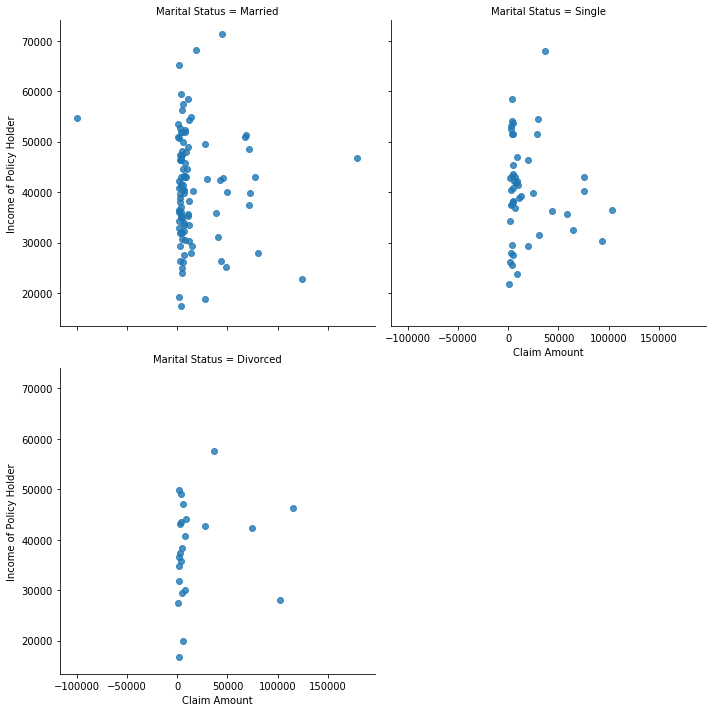

In [35]:
sns.lmplot("Claim Amount", "Income of Policy Holder", data=mifc_data_nn, fit_reg=False, col='Marital Status', col_wrap=2)

In datasets with a small number of features (10–15) Seaborn Pairplots can quickly enable a visual inspection of any relationships between variables. Graphs along the left diagonal represent the distribution of each feature, whilst graphs on off diagonals show the relationship between variables.

### Pairplots

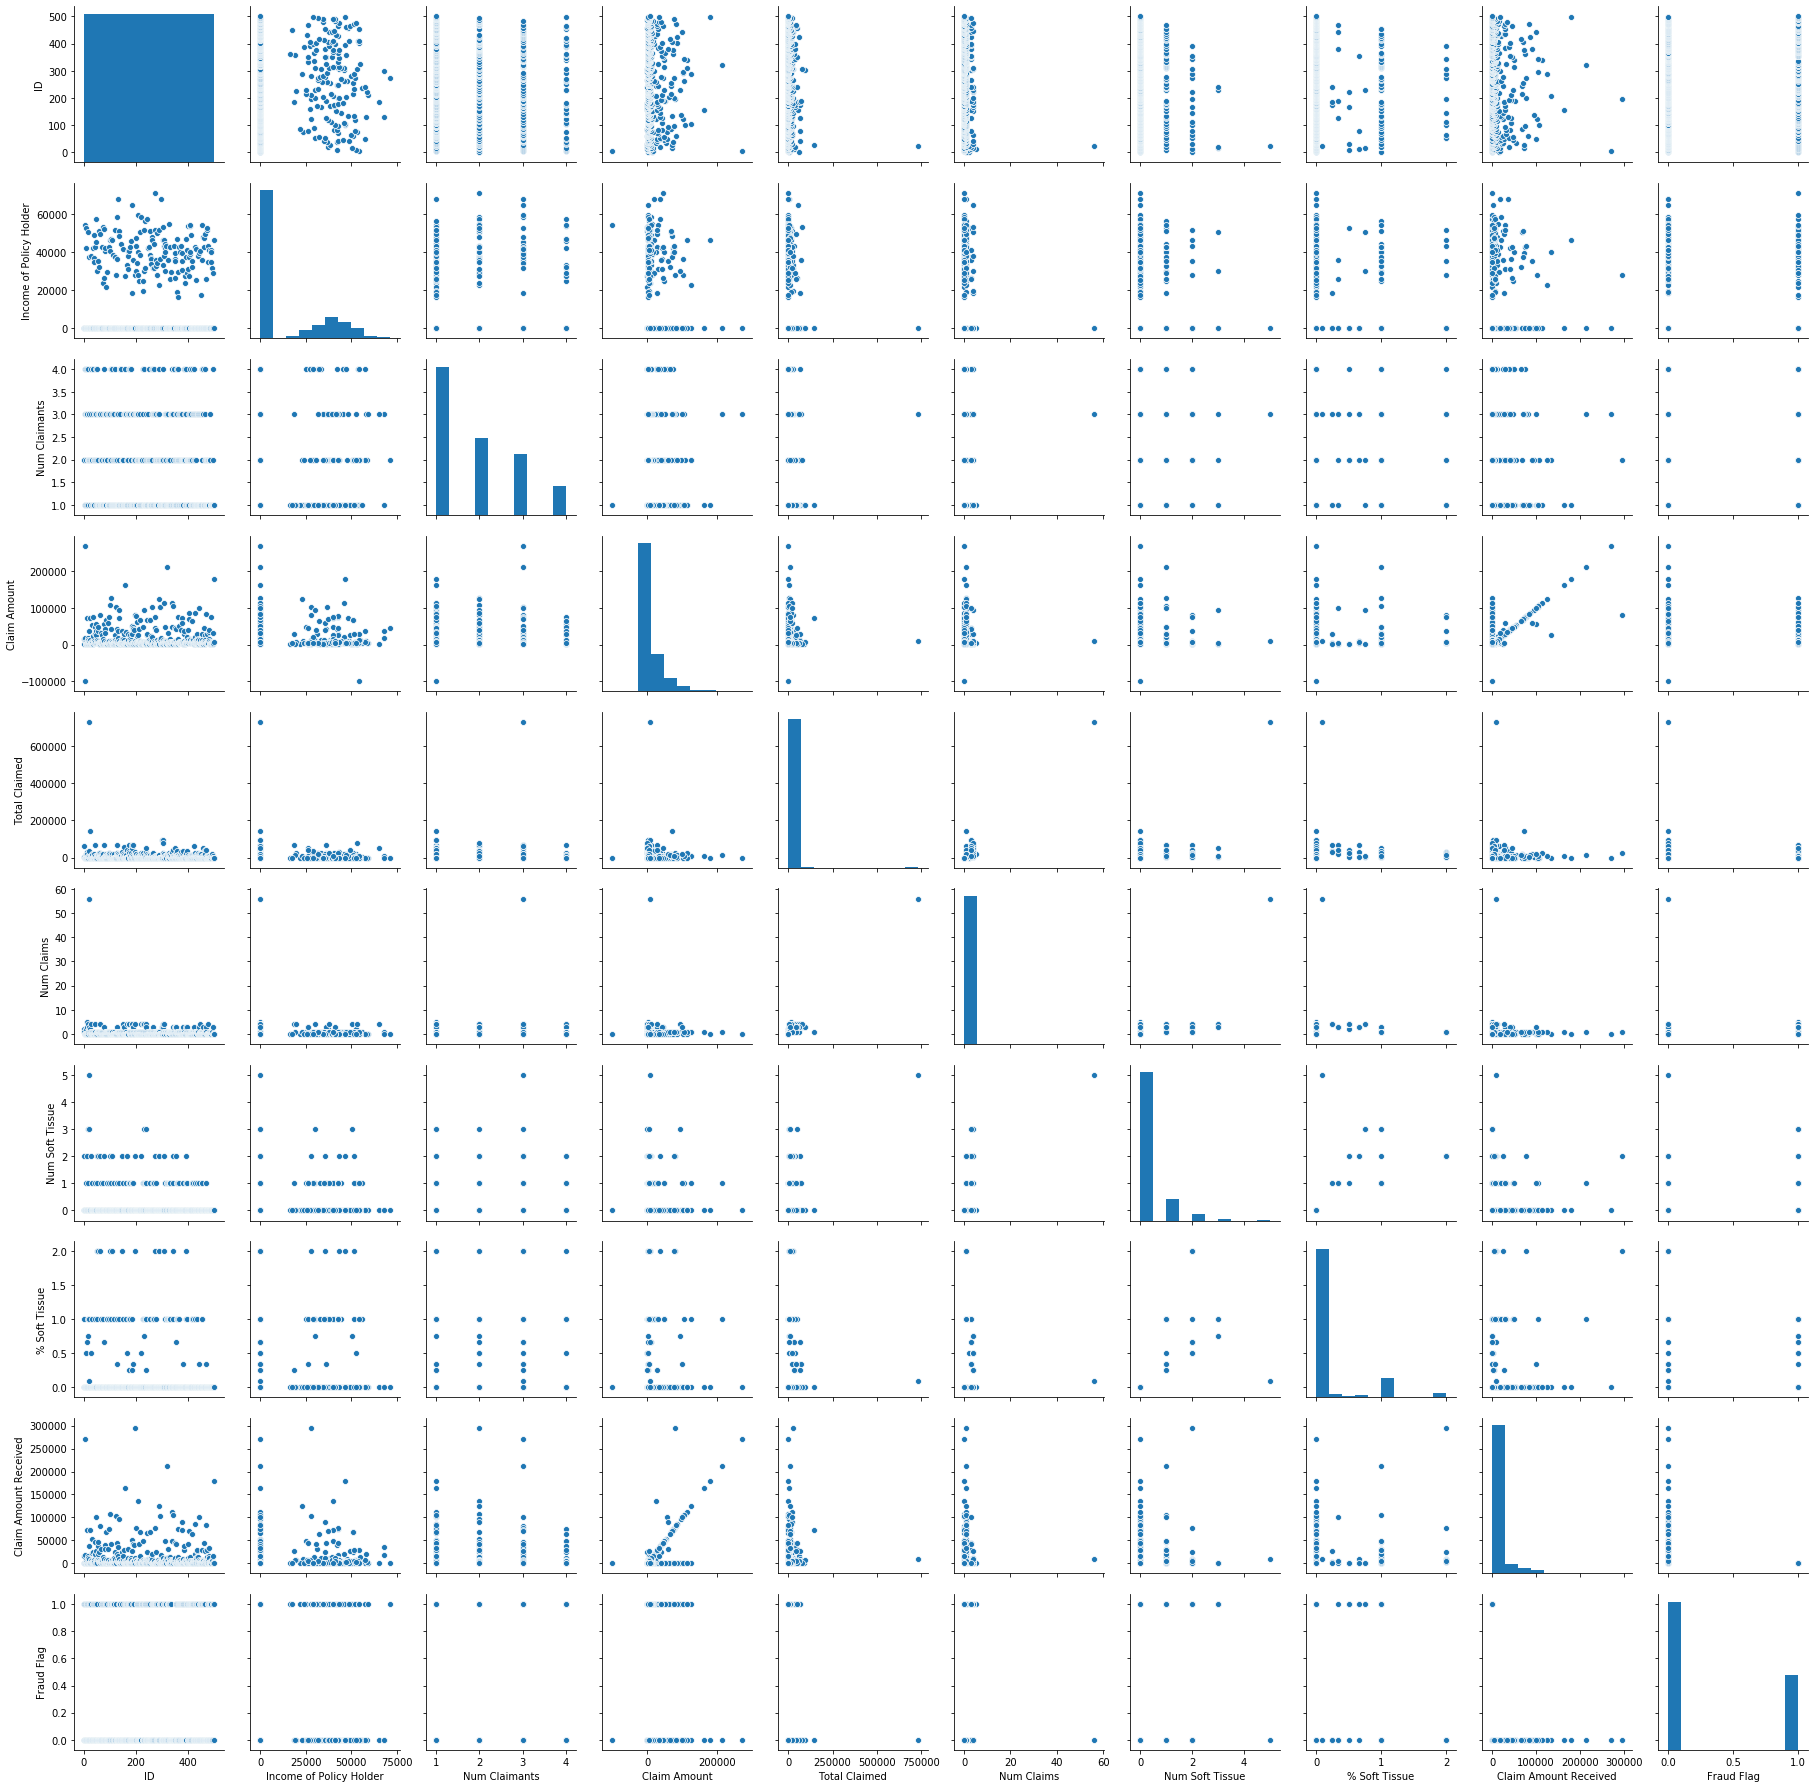

In [38]:
sns.pairplot(mifc_data)

### Correlation Heatmap

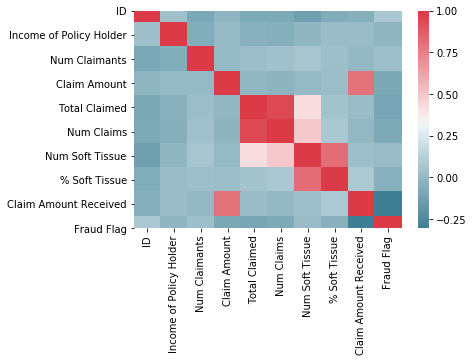

In [43]:
corr = mifc_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))